# Introduction

This document describes a data analysis project workflow that uses an R Markdown as a summary (home?) document in which codes written in R and Python are run and findings/narratives follow immediately after each code execution. For general information  on R Markdown, see [here](https://rmarkdown.rstudio.com/). For syntax, see [cheatsheet](https://www.rstudio.com/wp-content/uploads/2015/02/rmarkdown-cheatsheet.pdf).

R Markdown can be used to generate a (portable) document that includes,

- Codes: not just of R, but also other languages as well (e.g., Python)
- Tables/plots: output from source codes
- Narratives/findings: narratives documenting quick findings

Therefore, I think it's a great way to document progress/findings of a data analysis project. (NOTE: maybe add pros and cons of using Rmd vs. Jupyter Notebook)


# Pre-requisites

- Need to have [pandoc](https://pandoc.org) installed.
- Need to have several latest R packages installed: e.g., rmarkdown, reticulate (to use Python)

# Examples

For both R and Python, this document will show examples of working with

- small code snippets embedded within Rmd document
- import/source functions defined in separate scripts then use them within Rmd document
- execute/source separate script files to show outputs from corresponding scripts

In this workflow, I find it helpful to have at least 3 different vim/REPL paired sessions open:

- vim/Rmd for the source .Rmd editing and an interactive R session (let's call it session "Rmd")
- vim/R for .R script file editing and an interactive R session  (let's call it session "R")
- vim/Py for .py script file editing and an interactive Python session (let's call it session "Python")


In [3]:
# Working with R codes

# R set up (later, there is a separate python set up chunk)

library(ggplot2)
library(dplyr)
library(uncmbb)
library(reticulate) # for Python

# need to specify Python location if planning to use python
# note use_python is an R function, so need to be used in R chunk, not the python one
use_python(python3_path) # python3_path is defined in my .Rprofile



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


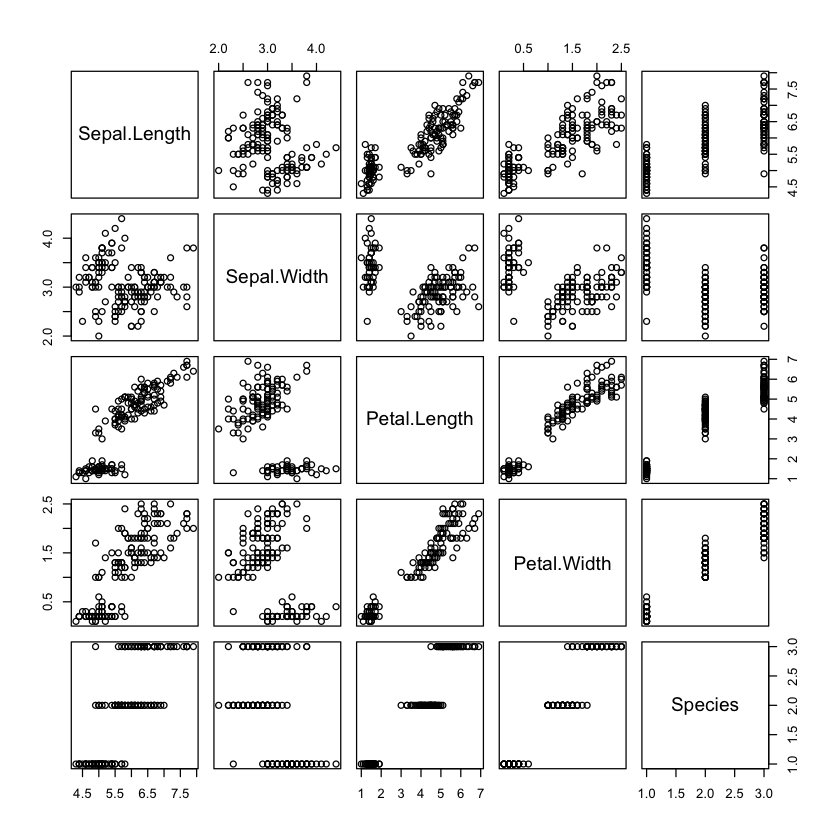

In [4]:
### Running R code snippets within Rmd document directly

# We can run simple R code snippets like below.

head(iris)
plot(iris)

- Note that `print` command was not needed to actually print output of the head and plot commands

When some R packages are needed, best practice is to load them in setup chunk, generally found in the beginning of the Rmd document.


school,Result,n
<chr>,<chr>,<int>
Duke,L,38
Duke,W,114
UNC,L,44
UNC,W,124


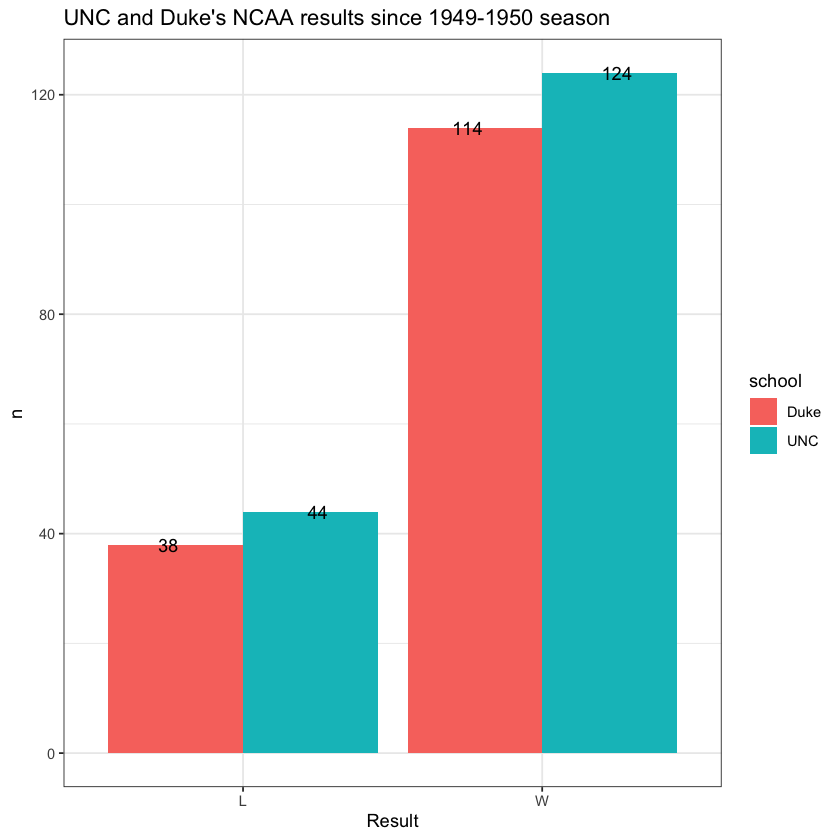

In [5]:
# Using public and personal R packages: load them in setup chunk in the beginning

df <- rbind(unc %>% mutate(school = "UNC"), duke %>% mutate(school = "Duke"))
df <- df %>% dplyr::filter(Type == "NCAA") %>%
             count(school, Result)
head(df)

df %>%  ggplot(aes(x = Result, y = n)) +
        geom_bar(aes(fill = school), stat = "identity", position = "dodge") +
        geom_text(aes(group = school, label = n), position = position_dodge(width = 1)) +
        labs(title = "UNC and Duke's NCAA results since 1949-1950 season") +
        theme_bw()

- Again, output from `head` and `ggplot` commands were displayed without manual printing.

Objects from above R code snippets can be accessed/used throughout this Rmd document, typically when describing the findings from the snippet. E.g., below findings are calculated inline using objects from above chunk.

Since 1949-1950 season,

- UNC has played total `r sum(df[df$school == "UNC",]$n)` games and won `r df[df$Result == "W" & df$school == "UNC",]$n` games, and lost `r df[df$Result == "L" & df$school == "UNC",]$n`.
- Duke has played total `r sum(df[df$school == "Duke",]$n)` games and won `r df[df$Result == "W" & df$school == "Duke",]$n` games, and lost `r df[df$Result == "L" & df$school == "Duke",]$n`.

Findings follow:

- Note again that if snippets are run within Rmd, then no manual `print` command is needed to print plot.
- The home (Rmd) document can become clogged easily.

So we've seen how we can use R code snippets in Rmd document, which can be effective for small operations. For more complex operations that require a bit more lines of codes, working directly with code snippets within Rmd document may not be ideal for  various reasons. In this case, we can save those (many) lines of codes in separate script files, then source them in Rmd document. First, a hybrid of the two is using functions defined in a separate R script file in the home (Rmd) document.


In [7]:
### Importing functions from R script files then use them within Rmd document

#We can source .R scripts within an R chunk and use functions defined in .R scripts. Below, we source [R/r_udfs.R](R/r_udfs.R) file, which has a definition for a function called `hello`, and we can use it in subsequent chunks of the home (Rmd) document.

# hello function from R/r_udfs.R
source("R/r_udfs.R")
hello("Jay")

[1] "Hello, Jay! 'hello' function is defined in r_udfs.R!"


- This allows functions to be defined in another .R script, then used in the home (Rmd) document
- Above example uses only one function from the source R script file, but the chunk can become clogged easily just as in the case of running code snippets directly from the home (Rmd) document.

### Displaying outputs from R script files within Rmd document

Another common (more realistic?) scenario in data analysis project is to start analysis by reading in data stored in a separate directory (e.g., data/), perform data transformation, then generate some tables/plots.

Below, we source [R/src_r_script.R](R/src_r_script.R) file in an R chunk, which reads in a data, summarizes it, and outputs a table and a plot. While writing the [R/src_r_script.R](R/src_r_script.R) code, I'd made sure each line works as intended from  a separate R session. This ensures

- the source script works, and
- the findings/narratives can be added to home (Rmd) document without having to render the whole Rmd document


In [8]:
source("R/src_r_script.R")

Warning message in file(file, "rt"):
“cannot open file 'data/champions.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection
